In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ismayilsiyad/educlaas/main/gender_classification_v7%202.csv')

In [3]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


### Converting categorical data to numerical

In [8]:
# Check the unique values in the 'gender' column
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [15]:
X = data.drop('gender', axis=1)
y = data['gender']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
y_train

1056      Male
1686    Female
187       Male
3840      Male
1525      Male
         ...  
2895      Male
2763    Female
905     Female
3980      Male
235       Male
Name: gender, Length: 4000, dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform( y_train)
y_test = le.fit_transform( y_test)

In [19]:
y_train

array([1, 0, 1, ..., 0, 1, 1])

#### Scaling data before passing to nural network

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

## Creating ANN

In [23]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 633 (2.47 KB)
Trainable params: 633 (2.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=5, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0692 - accuracy: 0.9697 - val_loss: 0.0755 - val_accuracy: 0.9700
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0685 - accuracy: 0.9720 - val_loss: 0.0831 - val_accuracy: 0.9630
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.0689 - accuracy: 0.9697 - val_loss: 0.0802 - val_accuracy: 0.9670
Epoch 4/10
800/800 [==============================] - 2s 3ms/step - loss: 0.0675 - accuracy: 0.9710 - val_loss: 0.0827 - val_accuracy: 0.9690
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0677 - accuracy: 0.9725 - val_loss: 0.0768 - val_accuracy: 0.9670
Epoch 6/10
800/800 [==============================] - 4s 4ms/step - loss: 0.0670 - accuracy: 0.9685 - val_loss: 0.0778 - val_accuracy: 0.9690
Epoch 7/10
800/800 [==============================] - 3s 3ms/step - loss: 0.0676 - accuracy: 0.9707 - val_loss: 0.0772 - val_accuracy: 0.9680
Epoch 

In [27]:
def learning_curve(history, epoch):
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epochs')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

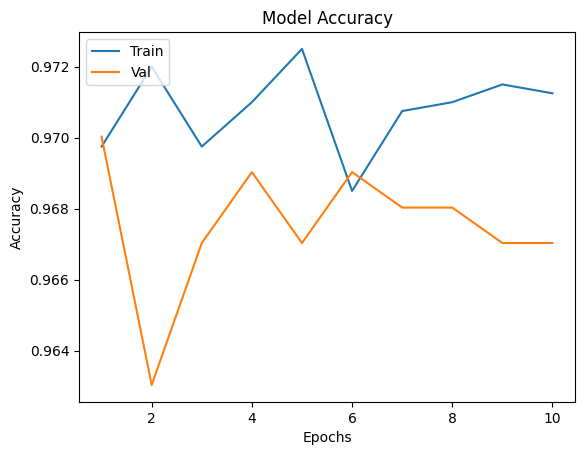

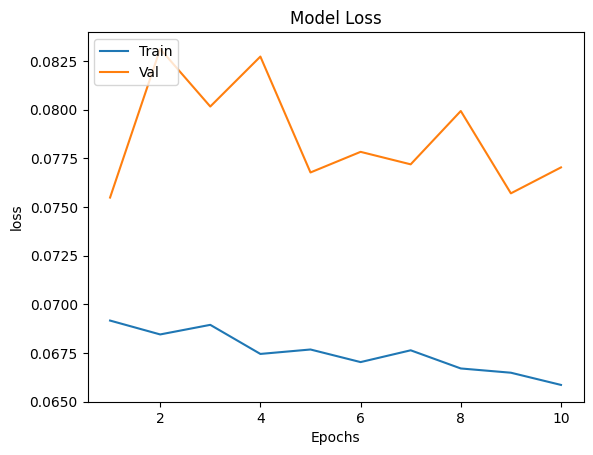

In [28]:
learning_curve(history, 10)

In [31]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 3ms/step


In [33]:
#converting probabilities into 1s and 0s
y_pred =np.rint(y_pred)

y_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float16)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [36]:
accuracy_score(y_test, y_pred)

0.967032967032967

In [37]:
precision_score(y_test, y_pred)

0.958498023715415

In [38]:
recall_score(y_test, y_pred)

0.9758551307847082

In [39]:
confusion_matrix(y_test, y_pred)

array([[483,  21],
       [ 12, 485]])